## Importando Bibliotecas:

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from math import pi, cos
import numpy as np
import time
import cv2

print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.4 


É opcional importar a biblioteca `colorsys`. Ela possui diversos comandos de conversão entre diferentes sistemas de código de cores, tais como RGB, HSV, HSL e YIQ.

In [2]:
import colorsys

___

## Sistemas de Cores

Para entender melhor sobre os dois principais sistemas de código de cores (RGB e HSV) existe essa imagem:

<img src="rgb_vs_hsv.jpeg" width=500>

No sistema **RGB** podemos interpretar os valores de cada um dos canais da seguinte forma:
* *R (Red)* : distância da aresta vermelha
* *G (Green)* : distância da aresta verde
* *B (Blue)* : distância da aresta azul

Note que a cor depende dos três canais (*Red*, *Green* e *Blue*)


No sistema **HSV** podemos interpretar os valores de cada um dos canais da seguinte forma:
* *H (Hue)* : localização no círculo de cores (cor)
* *S (Saturation)* : distância do centro (branco)
* *V (Value)* : distância da base (preto)

Note que a cor depende somente de um canal (*Hue*)

___

## Leitura de Imagens

Para carregar uma imagem usando o OpenCV basta usar o método `.imread()`.

In [3]:
grid = cv2.imread("img9x9.png")
grid.shape

(3, 3, 3)

Ao acessar o atributo `.shape` note que trata-se de uma tupla com 3 valores distintos `(val1, val2, val3)`. Esses valores devem ser entendidos da seguinte forma:

* `val1`: quantidade de pixels na vertical (altura da imagem)
* `val2`: quantidade de pixel na horizontal (largura da imagem)
* `val3`: quantidade de canais de cor (geralmente 3 canais)

A biblioteca `OpenCV` tem como *default* o sistema BGR (*blue*, *green* e *red*, nesta ordem) ao ler uma imagem, para convertê-la para qualquer outro sistema de cor basta usar o método `.cvtColor()` passando como atributos a variável da imagem carregada e o a converção de sistemas nativa do `OpenCV` da seguinte forma: `cv2.COLOR_(sistema atual)2(sistema novo)`.

Neste caso, a conversão é feita entre os sistemas BGR e RGB, portanto o atributo de converção fica assim: `cv2.COLOR_BGR2RGB`.

In [4]:
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)

Por fim para visualizar a imagem carregada usamos um *mix* entre as bibliotecas `OpenCV` e `matplotlib.pyplot`, usando o já conhecido `plt` mas com o método `.imshow()`.

**Obs.:** Todas as customizações de gráfico do `pyplot` estão disponíveis.

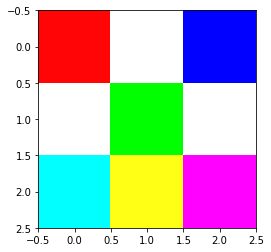

In [5]:
plt.imshow(grid_rgb)
plt.show()

___

## Conceito de Imagem-Matriz

Para a `OpenCV` uma imagem nada mais é do que uma matriz (*array*) com valores variando, neste caso, entre $0$ e $255$. 

In [6]:
grid_rgb

array([[[255,   5,   5],
        [255, 255, 255],
        [  1,   1, 255]],

       [[255, 255, 255],
        [  1, 255,   1],
        [255, 255, 255]],

       [[  2, 255, 255],
        [255, 255,  21],
        [255,   1, 255]]], dtype=uint8)

Ainda não está convencido? Use a função `type` na imagem.

In [7]:
type(grid_rgb)

numpy.ndarray

Portanto é possível uma segunda interpretação com relação aos valores do atributo `.shape`: uma matriz com 3 dimensões `(val1, val2, val3)`.

In [8]:
grid_rgb.shape

(3, 3, 3)

Portanto, é possível trabalhar em cima dessa ideia, realizando diversas operações na imagem como se fosse uma matriz, e a `OpenCV` se encarrega de converter o resultado para uma imagem quando usamos o método `.imshow()`.

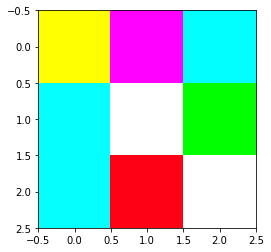

In [9]:
new_grid_rgb = grid_rgb.transpose()

plt.imshow(new_grid_rgb)
plt.show()

___

## Canais de Cores

Todas as imagens são formadas por um conjunto de pixels e cada pixel é um conjunto de três valores numéricos, correspondendo aos valores de cada canal de cor em um sistema de cores específico.

Entretanto é muito comum errar a o sistema de cores e ler os valores de um sistema de cores em outro. O resultado é algo similar com a imagem abaixo: é possível identificar o conteúdo da imagem, mas é visível que as cores não estão corretas.

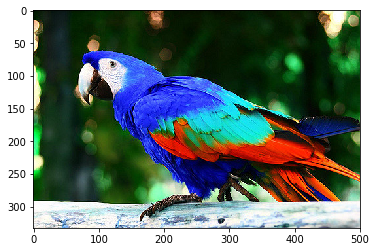

In [10]:
arara = cv2.imread("arara_medium.jpg")

plt.imshow(arara)
plt.show()

No caso da imagem acima, o que ocorre é que importamos uma imagem em RGB mas lembre-se que a `OpenCV` tem como *default* o sistema BGR.

Para corrigir esse problema basta fazer a conversão entre sistemas de cor já exemplificada anteriormente.

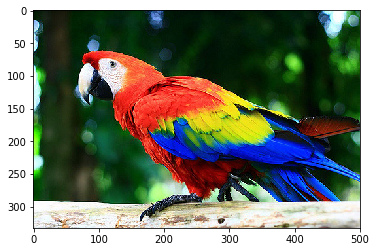

In [11]:
arara_correction = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)

plt.imshow(arara_correction)
plt.show()

___

## Separação dos canais da imagem

Esse método mescla os dois conceitos de imagem abordados anteriormente.

Pensando na imagem como um conjunto de pixels em determinado sistema de cor, lembre-se que o último valor da tupla `(val1, val2, val3)` retornada pelo atributo `.shape` é a quantidade de canais de cor.

Portanto, existem três canais de cor (um para cada letra do sistema de cores utilizado).

In [12]:
arara_correction.shape

(333, 500, 3)

Pensando agora na imagem como uma matriz de 3 dimensões, sendo que a última dimensão tem apenas 3 divisões, pode-se dizer cada canal de cor é o conjunto de todos os dados na vertical (1ª dimensão) e horizontal (2ª dimensão), em cada uma das 3 divisões de profundidade (3ª dimensão).

Portanto a separação dos canais nada mais é do que o *slicing* dessa matriz da forma descrita acima.

In [13]:
red_channel = arara_correction[:, :, 0]
green_channel = arara_correction[:, :, 1]
blue_channel = arara_correction[:, :, 2]

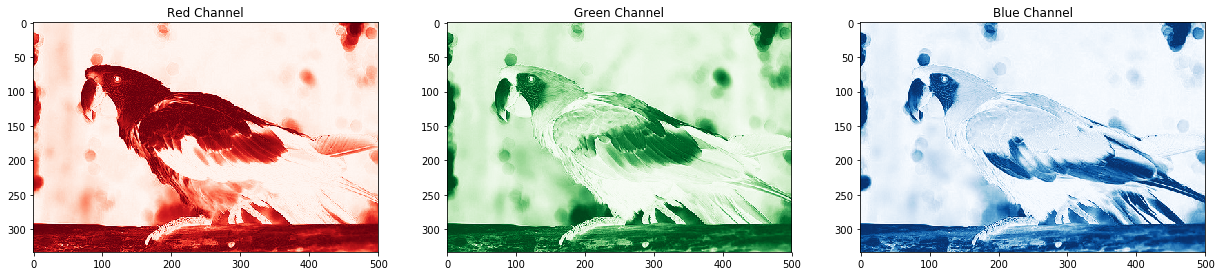

In [14]:
plt.figure(figsize=(21,7))

plt.subplot(131)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")

plt.subplot(132)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")

plt.subplot (133)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")

plt.show()

___

## Input da Webcam

Além de ler e analisar imagens, a `OpenCV` pode também acessar a webcam de um computador e gerar as imagens que devem ser analisadas em tempo real. Para isso basta usar o método `.VideoCapture()`, passando como único parâmetro o ID da webcam, que geralmente é $0$ (tente vários IDs para descobrir qual é em sua webcam).

In [15]:
webcam = cv2.VideoCapture(0)

Usa-se também o método `.sleep()` da biblioteca `time` para esperar a webcam ficar pronta. O atributo passado para esse método corresponde a quantos segundos o programa vai esperar.

In [16]:
time.sleep(3)

Para receber os dados da webcam, usa-se o método `read` da variável `webcam` definida anteriormente. Esse método retorna dois valores com as seguintes características:
* `status`(`boolean`):  verifica se a imagem (*frame*) foi recebido corretamente
* `image`(`array`): imagem obtida pela webcam

In [17]:
status, image = webcam.read()
print(type(status))
print(type(image))

<type 'bool'>
<type 'numpy.ndarray'>


Por fim, usa-se o método `.release()` para encerrar a captura de imagem pela webcam

In [18]:
webcam.release()

Por fim, é possível visualizar a imagem capturada, lembrando sempre que é necessário fazer a converção de BGR para RGB

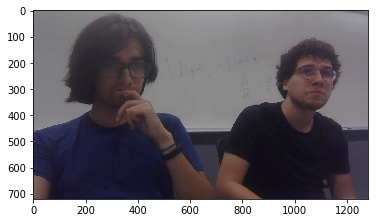

In [19]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.show()

___

## Normalização de Ruído

**a)** Carregar o arquivo "imagem.png", exibir as dimensões do arquivo e visualizar:

(512, 1024, 3)


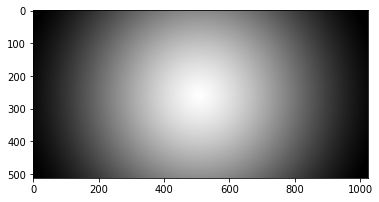

In [20]:
imagem = cv2.imread("imagem.png")

print(imagem.shape)

plt.imshow(imagem)
plt.show()

Note que apesar de ser uma imagem ser somente em tons de cinza, ela tem as três componentes R, G e B.

**b)** Crie uma imagem de saída (entende-se como imagem de saída uma cópia da imagem de entrada) em tons de cinza.

Primeiramente criar uma imagem em tons de cinza é simplesmente transformar os 3 canais em um só.

**Obs.:** isso só é possível pois em imagens em preto e branco

O porquê de só imagens em preto e branco está atrelado ao sistema de cores. Observe a imagem abaixo:

<img src="rgb_gray_scale.png" width=400>

Entenda que os tons de cinza (chamados de "*gray scale*" na imagem) são a diagonal interna do cubo que representa o sistema RGB. A diagonal interna de um cubo possui uma característica interessante: dista igualmente da origem nos três eixos.

Ou seja, a tupla que representa cores (`(val1, val2, val3)`) presentes nessa diagonal possuem a seguinte propriedade: `val1` $=$ `val2` $=$ `val3`. Como todos os valores são exatamente iguais não é necessário uma tupla com 3 valores, a tupla adquire um valor único.

Note que ao fazer a conversão de BGR (*default* da `OpenCV`) para *Gray Scale*, a tupla do atributo `.shape` possui somente 2 valores, significando uma matriz 2D.

(512, 1024)


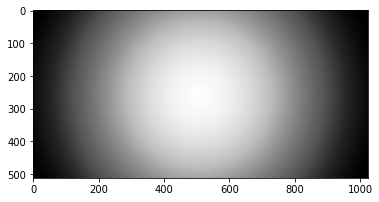

In [21]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

print(imagem_gray.shape)

plt.imshow(imagem_gray, cmap="Greys_r")
plt.show()

A imagem de saída nada mais é do que uma "tela em branco" para onde podemos exportar o resultado. Em outras palavras, imagem vazia, ou ainda, uma matriz vazia (onde todos os valores são $0$). Entretanto, como $0$ representa a cor preta na *Gray Scale*, então a imagem de saída é uma imagem completamente preta.

Para criá-la podemos fazer de dois métodos distintos:

 **Método I:** Usar o método `.copy()` e depois sobreesrever todos os valores da matriz para $0$

In [22]:
imagem_saida_1 = imagem_gray.copy()
imagem_saida_1[:] = 0

**Método II:** Usar o método `.zeros()` da biblioteca `numpy` para criar uma matriz vazia, usando os valores obtidos pelo atributo `.shape` como parâmetros para a dimensão dessa matriz

In [23]:
imagem_saida_2 = np.zeros(imagem_gray.shape, dtype=np.uint8)

De qualquer forma, o resultado é exatamente o mesmo: uma matriz com todos os elementos iguais a $0$, ou seja, uma imagem em preto.

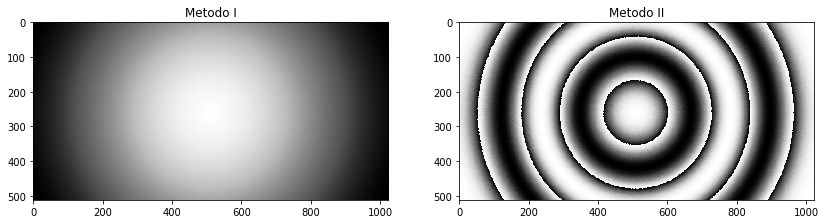

In [36]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(imagem_saida_1, cmap="Greys_r")
plt.title("Método I")

plt.subplot(122)
plt.imshow(imagem_saida_2, cmap="Greys_r")
plt.title("Método II")

plt.show()

In [37]:
pixel_list = []

for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        pixel_saida = int(255*cos(scale( imagem_gray[i][j] )))
        pixel_list.append(pixel_saida)
        
min_pixel = min(pixel_list)
max_pixel = max(pixel_list)

In [38]:
imagem_saida_norm = np.zeros(imagem_saida_2.shape, dtype=np.uint8)

for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        pixel_saida = int(255.0*cos(scale( imagem_gray[i][j] )))
        pixel_normed = (pixel_saida-min_pixel)/(max_pixel - min_pixel)
        pixel_rescaled = pixel_normed*max_pixel
        imagem_saida_norm[i][j] = int(pixel_rescaled)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 5: ordinal not in range(128)

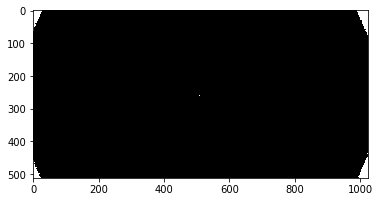

In [39]:
plt.imshow(imagem_saida_norm, cmap="Greys_r")
plt.title("Correção de Ruído Total")
plt.show()

___

## Atividade 1 - Equalização de Histograma

Execute as duas células abaixo e resolva as questões:

In [ ]:
rintin = cv2.imread("RinTinTin.jpg")
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [ ]:
hist, bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

plt.subplot(122)
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'orange', label='Histogram')
plt.plot(cdf_normalized, color = 'purple', label="CDF")
plt.legend(loc='upper right')
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0,256])
plt.grid()

plt.show()

**a)** O histograma fornecido aproveita bem as faixas de cores?

In [ ]:
max_pixel_value = max(rintin_gray.flatten())
min_pixel_value = min(rintin_gray.flatten())
print("Faixa de Cores: {} a {}".format(min_pixel_value, max_pixel_value))

Não, o histograma mostra que grande parte dos pixels estão na condensados em apenas uma pequena parte da faixa de cores.

**b)** Crie e plote uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 

O método `.equalizeHist()` redistribui os valores de cor ao longo de toda a faixa de cores. 

In [ ]:
rintin_dist = cv2.equalizeHist(rintin_gray)

hist, bins = np.histogram(rintin_dist.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(rintin_dist, cmap="Greys_r")

plt.subplot(122)
plt.hist(rintin_dist.flatten(),256,[0,256], color = 'orange', label="Histogram")
plt.plot(cdf_normalized, color = 'purple', label="CDF")
plt.legend(loc='upper right')
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0,256])
plt.grid()
plt.show()

___

## Atividade 2 - Máscaras e Filtros

**a)** Leia com a OpenCV a figura abaixo:

<img src="hall_box_battery1.jpg" width=400>

In [ ]:
rgb_image = cv2.cvtColor(cv2.imread("hall_box_battery1.jpg"), cv2.COLOR_BGR2RGB)
rgb_image.shape

**b)** Separe os canais das imagens e analise seus histogramas.

Lembrando que o terceiro valor do `.shape` é a quantidade de canais de cor, podemos separar cada um dos canais selecionando somente um dos valores por vez.

In [ ]:
red_channel = rgb_image[:, :, 0]
green_channel = rgb_image[:, :, 1]
blue_channel = rgb_image[:, :, 2]

Será criada uma função para gerar a análise de histogramas, uma vez que os mesmos comandos serão aplicados nos diferentes canais de cor.

In [ ]:
def image_hist_analisys(image, title="", colormap="Greys_r"):
    hist, bins = np.histogram(image.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.figure(figsize=(12,3))

    plt.subplot(121)
    plt.title(title)
    plt.imshow(image, cmap=colormap)

    plt.subplot(122)
    plt.hist(image.flatten(),256,[0,256], color = 'orange', label="Histogram")
    plt.plot(cdf_normalized, color = 'purple', label="CDF")
    plt.legend(loc='upper right')
    plt.title("Análise de Distribuição na Faixa de Cores")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim([0,256])
    plt.grid()
    plt.show()

In [ ]:
image_hist_analisys(red_channel, title="Canal: R (vermelho)", colormap="Reds")
image_hist_analisys(green_channel, title="Canal: G (verde)", colormap="Greens")
image_hist_analisys(blue_channel, title="Canal: B (azul)", colormap="Blues")

**c)** A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

Nota-se através das imagens que a caixa vermelha é destacada em vermelho, no Canal R (vermelho) e a bateria azul é destacada em azul no Canal B (azul).

Entretanto nota-se através do histograma que há muitos picos em cada um dos canais dificultando o destaque do objeto em questão. O que ocorre é que a imagem original possui muitos tons de branco que são combinações de altos valores dos três canais(branco= R:255, G:255 e B:255), e quando os canais são separados e analisados não temos certeza se os picos são as cores respectivas de cada canal ou se são tons brancos interferindo.

Essa é um dos maiores problemas quando se trabalha com o sistema RGB, a cor depende dos três canais e, por consequência interfere nos três simultaneamente.

**d)** Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui

Através de um colorpicker (seletor de cores de um pixel de uma determinada imagem) online, obtivemos os códigos, RGB do vermelho da caixa e do azul da bateria, ambos presentes na foto.

In [ ]:
rgb_red = (221, 49, 37)
rgb_blue = (1, 144, 197)

Para selecionar determinada cor, deve-se considerar um intervalo de cores próximas a cor de interesse, pois sempre há nuances de tonalidade em uma imagem.

Entretanto, conforme a explicação entre as diferenças entre os sistemas RGB e HSV no começo do arquivo, sabemos que no em HSV a cor depende de somente um canal.

Isso significa que é mais fácil para compreender e visualizar quando fazemos alguma mudança nos valores, por isso as cores serão convertidas de RGB para HSV.

Antes que realizar as conversões é necessário acentuar a diferença de interpretação entre as bibliotecas `OpenCV` e `colorsys`.

O `colorsys` trabalha com cada um dos canais no intervalo de $0$ a $1$ tanto nos *inputs* quanto nos *outputs*. Já o `OpenCV` trabalha com cada um dos canais no intervalo de $0$ a $255$, com exceção do canal **Hue** que possui intervalo de $0$ a $180$. Portanto temos que:

* No sistema **RGB**:

|Canal| `OpenCV` |`colorsys`|
|-----|----------|----------|
|**R**| [0-255]  | [0-1]    |
|**G**| [0-255]  | [0-1]    |
|**B**| [0-255]  | [0-1]    |

* No sistema **HSV**:

|Canal| `OpenCV` |`colorsys`|
|-----|----------|----------|
|**H**| [0-180]  | [0-1]    |
|**S**| [0-255]  | [0-1]    |
|**V**| [0-255]  | [0-1]    |

Portanto, antes de passar os valores para o `colorsys` converter, é necessário dividir os valores em $R$ , $G$ e $B$ por $255$ e os valores retornados pelo `colorsys` multiplicar os canais $S$ e $V$ por $255$ e o canal $H$ por $180$.

In [ ]:
red_cvt = colorsys.rgb_to_hsv(rgb_red[0]/255, rgb_red[1]/255, rgb_red[2]/255)
blue_cvt = colorsys.rgb_to_hsv(rgb_blue[0]/255, rgb_blue[1]/255, rgb_blue[2]/255)

hsv_red = (int(red_cvt[0]*180), int(red_cvt[1]*255), int(red_cvt[2]*255))
hsv_blue = (int(blue_cvt[0]*180), int(blue_cvt[1]*255), int(blue_cvt[2]*255))

print("HSV red:", hsv_red)
print("HSV blue:", hsv_blue)

Para facilitar o desenvolvimento do raciocínio para o programa, a imagem abaixo está disponível:
<img src="hsv.png" width=200>

Pensando agora no sistema HSV  e no quão variável cada uma dos canais varia, podemos dizer que:
* O valor ***Hue***  do objeto varia pouco, pois é o objeto possui uma cor mínimamente uniforme ($H\space\approx\space cte$)
* O valor ***Saturation*** do objeto varia consideravelmente, pois a luminosidade do ambiente tende os valores para o branco ($S\space\rightarrow\space0$)
* O valor ***Value*** do objeto varia consideravelmente, pios as sombras do ambiente tendem os valores para o preto ($V\space\rightarrow\space0$)

Portanto, será criado os intervalos de segurança para cada um dos canais, baseando-se na regra a seguir:
* ***Hue***: Entre $-25$ e $+25$ do valor de referência (considernado cores similares/próximas)
* ***Saturation***: Entre $50$ e $255$ (desconsidernado valores muito próximos do branco)
* ***Value***: Entre $50$ e $255$ (desconsiderando valores muito próximos do preto)

In [ ]:
def color_security_range(hue_value):
    return (hue_value-25, 50, 50), (hue_value+25, 255, 255)

In [ ]:
hsv_min_red, hsv_max_red = color_security_range(hsv_red[0])
hsv_min_blue, hsv_max_blue = color_security_range(hsv_blue[0])

Lembrando que esses intervalos são a base da máscara (que será explicado mais a frente), podendo e devendo ser modificados caso não seja obtido o resultado correto. A função `correction` abaixo disponibiliza um jeito simples para corrigir individualmente cada canal de cores.

In [ ]:
def correction(pixel, channel_number, new_value):
    list_pixel = list(pixel)
    list_pixel[channel_number] = new_value
    return tuple(list_pixel)

Abaixo há uma correção necessária, após notar que o resultado usando a regra base não foi satisfatório. Se quiser, pule a próxima célula para ver o resultado sem a correção.

In [ ]:
hsv_min_red = correction(hsv_min_red, 1, 100)
hsv_min_red = correction(hsv_min_red, 2, 150)

Por fim, lembre-se de converter a imagem original para o sistema HSV.

In [ ]:
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

Com todas as conversões feitas e os intervalos criados, podemos criar as máscaras para filtras as cores de interesse, usando o método `.inRange()` do `OpenCV`.O que esse método faz é o seguinte:

Confere, para cada pixel da imagem, se ele está ou não dentro do intervalo de interesse e retorna valores da seguinte forma:
* Se o pixel **está** dentro do intervalo: retorna um pixel branco
* Se o pixel **não está** dentro do intervalo: retorna um pixel preto

O resultado obtido é chamado de **máscara**.

In [ ]:
red_mask = cv2.inRange(hsv_image, hsv_min_red, hsv_max_red)
blue_mask = cv2.inRange(hsv_image, hsv_min_blue, hsv_max_blue)

In [ ]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(red_mask, cmap="Greys_r")
plt.title("Red Mask")

plt.subplot(122)
plt.imshow(blue_mask, cmap="Greys_r")
plt.title("Blue Mask")

plt.show()

Com as máscaras prontas, podemos utilizar o método `.bitwise_and()`, sobrepondo a imagem original somente nas áreas brancas da máscara e fazendo com que destaque somente o objeto de interesse.

O resultado obtido é chamado de **filtro**.

In [ ]:
red_filter = cv2.bitwise_and(rgb_image, rgb_image, mask=red_mask)
blue_filter = cv2.bitwise_and(rgb_image, rgb_image, mask=blue_mask)

Note que a imagem em RGB é o parâmetro para os filtros, uma vez que é essa a sua imagem de referência. A imagem em HSV só foi usada para criar as máscaras.

In [ ]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(red_filter)
plt.title("Red Filter")

plt.subplot(122)
plt.imshow(blue_filter)
plt.title("Blue Filter")

plt.show()

Por fim, basta unir ambos os filtros em uma única imagem. Para isso basta somar (literalmente) ambas máscaras e depois criar um filtro com a nova máscara.

In [ ]:
red_blue_mask = red_mask + blue_mask
red_blue_filter = cv2.bitwise_and(rgb_image, rgb_image, mask=red_blue_mask)

plt.imshow(red_blue_filter)
plt.title("Red and Blue Filters")
plt.show()

___

# Atividade 3 - Detecção de Bordas

**a)** Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

In [40]:
hall_box = cv2.cvtColor(cv2.imread("hall_box_battery_atividade3.png"), cv2.COLOR_BGR2GRAY)
hall_box.shape

(576, 1024)

**b)** Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele.

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Para criar uma cópia da imagem (como pede o exercício) podemos simplesmente criar uma matriz vazia (com todos os valores sendo $0$) com as mesmas proporções da imagem. Neste caso, serão criadas duas cópias, contrastando as alterações feitas na vertical e na horizontal.

In [41]:
ver_hall_box = np.zeros(hall_box.shape, dtype=np.uint8)
hor_hall_box = np.zeros(hall_box.shape, dtype=np.uint8)

Em seguida podemos realizar quaisquer operações matriciais e adicionar os valores para a cópia da imagem. Em sequência será feita o cálculo matricial pedido pelo exercício:
>" cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele "

In [42]:
# Na vertical:
for i in range(1, hall_box.shape[0]-1):
    for j in range(1, hall_box.shape[1]-1):
        ver_hall_box[i][j] = abs(hall_box[i][j+1] - hall_box[i][j-1])
        
# Na horizontal:    
for i in range(1, hall_box.shape[0]-1):
    for j in range(1, hall_box.shape[1]-1):
        hor_hall_box[i][j] = abs(hall_box[i+1][j] - hall_box[i-1][j])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


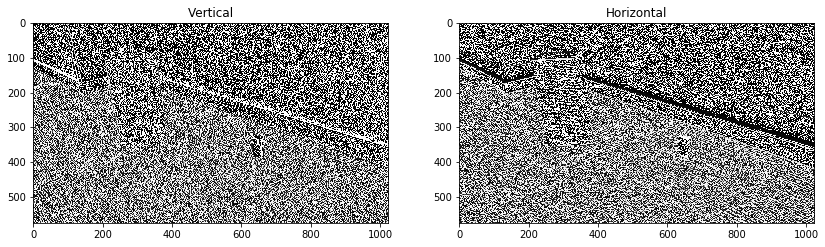

In [43]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(ver_hall_box, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Vertical")

plt.subplot(122)
plt.imshow(hor_hall_box, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Horizontal")

plt.show()

In [44]:
ver_hall_box = np.zeros(hall_box.shape, dtype=np.uint8)


pixel_list_v = []
for i in range(1, hall_box.shape[0]-1):
    for j in range(1, hall_box.shape[1]-1):
        new_pixel = hall_box[i][j+1] - hall_box[i][j-1]
        pixel_list_v.append(new_pixel)
        if new_pixel <= 0:
            ver_hall_box[i][j] = 0
        elif new_pixel >= 255:
            ver_hall_box[i][j] = 255
        else:
            ver_hall_box[i][j] = int(new_pixel)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


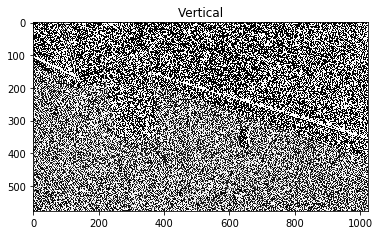

In [45]:
plt.imshow(ver_hall_box, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Vertical")
plt.show()

In [48]:
# Na vertical:
pixel_list_v = []


        
min_v_pixel = np.amin(ver_hall_box)
max_v_pixel = np.amax(ver_hall_box)



for i in range(1, hall_box.shape[0]-1):
    for j in range(1, hall_box.shape[1]-1):
        new_v_pixel = hall_box[i][j+1] - hall_box[i][j-1]
        v_pixel_normed = (new_v_pixel - min_v_pixel)/(max_v_pixel - min_v_pixel)
        v_pixel_rescaled = v_pixel_normed*max_v_pixel
        ver_hall_box[i][j] = v_pixel_rescaled
        pixel_list_v.append(v_pixel_rescaled)
        
# Na horizontal:    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


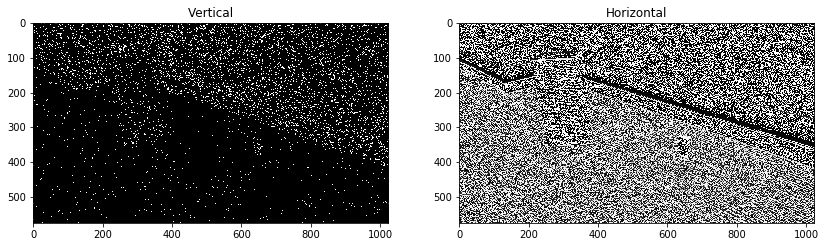

In [49]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(ver_hall_box, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Vertical")

plt.subplot(122)
plt.imshow(hor_hall_box, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Horizontal")

plt.show()

**c)** Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>